In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('analyse_75_2011_forme.csv')

# Création d'un graphique linéaire

distribution des évènements de contestation politique entre 1979 et 2000.

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_29368/1265409811.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = filtered_df.groupby('year').apply(lambda x: pd.Series({


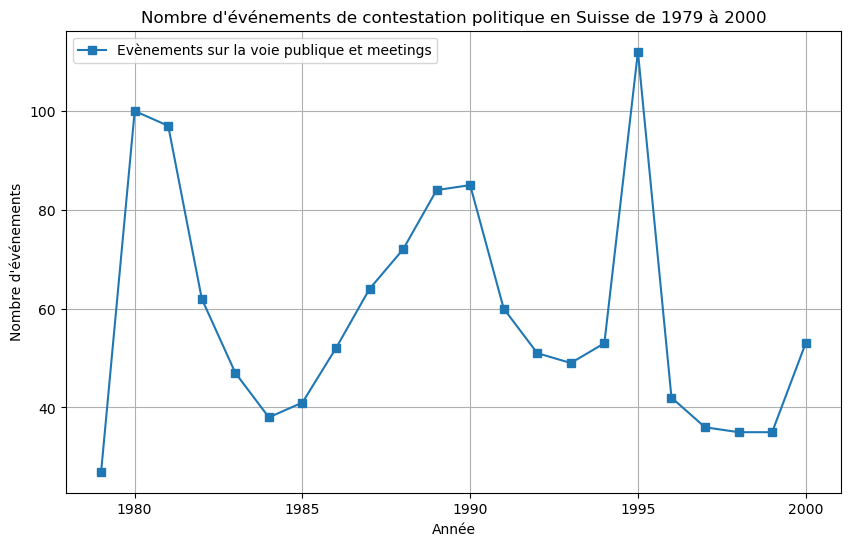

In [9]:

# Filtrer les années entre 1975 et 2011 inclus
filtered_df = df[(df['year'] >= 1979) & (df['year'] <= 2000)]

# Groupes d'intérêt pour fk_forme
group1 = ['demonstration, protest march', 'illegal demonstration', 'other demonstrative forms', 'protest meeting','demonstration with violence','other symbolic/ludic non-confrontational forms', 'symbolic/ludic confrontational actions', 'other legal confrontational forms', 'other illegal confrontational forms', 'other illegal and violent confrontational forms']

# Créer des agrégations pour chaque groupe
summary = filtered_df.groupby('year').apply(lambda x: pd.Series({
    'Evenements': x.loc[x['form'].isin(group1), 'event_count'].sum()
    
})).reset_index()


# Créer le graphique
plt.figure(figsize=(10, 6))  # Taille du graphique

# Tracer  une courbe
plt.plot(summary['year'], summary['Evenements'], label='Evènements sur la voie publique et meetings', marker='s')

# Ajouter des légendes et des titres
plt.xlabel("Année")
plt.ylabel("Nombre d'événements")
plt.title("Nombre d'événements de contestation politique en Suisse de 1979 à 2000")
plt.legend()


# Afficher la grille
plt.grid(True)
plt.show()

# Création d'un graphique linéaire des différents thèmes des manifestations

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_29368/1104805426.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = filtered_df.groupby('year').apply(


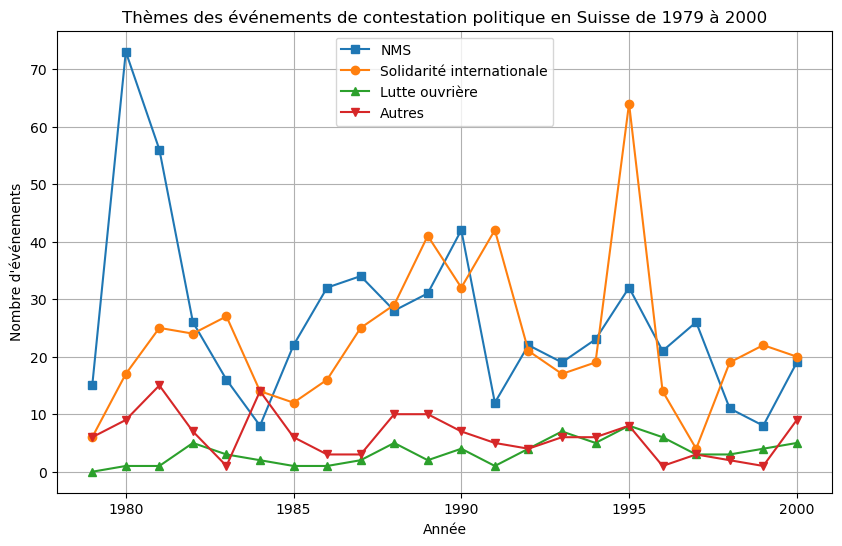

In [17]:
df = pd.read_csv('analyse_75_2011_theme.csv')
# Filtrer les années entre 1975 et 2011 inclus
filtered_df = df[(df['year'] >= 1979) & (df['year'] <= 2000)]

# Groupes d'intérêt pour fk_forme
group1 = ['Anti-Nuclear Energy', 'Environment', 'Homosexuals', 'Solidarity internal (incl. anti-racism)', 'Foreigners internal', 'Women', 'Other left', 'Squatters, autonomous youth']
group2 = ['Civil rights', 'Foreigners external', 'Peace', 'Solidarity external', 'Other right', 'Internat. cooperation (incl. EU)', 'Global justice mobilization']
group3 = ['Labor', 'Farmers']
group4 = ['Others', 'Countermobilization NSM', 'Regionalist mobilization', 'Right-wing extremism', 'Education']
# Créer des agrégations pour chaque groupe
summary = filtered_df.groupby('year').apply(
    lambda group: pd.Series({
        'NMS': group.loc[group['goal_recode'].isin(group1), 'event_count'].sum(),
        'Sol_internationale': group.loc[group['goal_recode'].isin(group2), 'event_count'].sum(),
        'Lutte_ouvriere': group.loc[group['goal_recode'].isin(group3), 'event_count'].sum(),
        'Autres': group.loc[group['goal_recode'].isin(group4), 'event_count'].sum(),
    })
).reset_index()


# Créer le graphique
plt.figure(figsize=(10, 6))  # Taille du graphique

# Tracer  une courbe
plt.plot(summary['year'], summary['NMS'], label='NMS', marker='s')
plt.plot(summary['year'], summary['Sol_internationale'], label='Solidarité internationale', marker='o')
plt.plot(summary['year'], summary['Lutte_ouvriere'], label='Lutte ouvrière', marker='^')
plt.plot(summary['year'], summary['Autres'], label='Autres', marker='v')


# Ajouter des légendes et des titres
plt.xlabel("Année")
plt.ylabel("Nombre d'événements")
plt.title("Thèmes des événements de contestation politique en Suisse de 1979 à 2000")
plt.legend()

# Afficher la grille
plt.grid(True)
plt.show()